In [1]:
import pandas as pd
import numpy as np
from darts import TimeSeries
import calendar
from darts.models import ExponentialSmoothing

/Users/student/.pyenv/versions/3.10.6/envs/forward_farming/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data = pd.read_csv('../clean_data/clean_sheff_data.csv')

In [5]:
data.tail(10)

,Unnamed: 0,yyyy,mm,tmax(degC),tmin(degC),af(days),rain(mm),sun(hours),avgtemp(degC)
1116,1668,2022,1,8.0,2.6,3.0,25.8,85.7,5.30
1117,1669,2022,2,9.6,3.5,1.0,182.6,80.4,6.55
1118,1670,2022,3,11.9,3.7,3.0,46.4,150.0,7.80
1119,1671,2022,4,13.7,5.1,2.0,27.6,163.0,9.40
1120,1672,2022,5,17.8,9.6,0.0,28.4,138.3,13.70
1121,1673,2022,6,20.4,10.8,0.0,55.0,31.7,15.60
1122,1674,2022,7,23.3,14.5,0.0,23.0,190.6,18.90
1123,1675,2022,8,23.9,13.6,0.0,56.4,233.4,18.75
1124,1676,2022,9,18.4,11.1,0.0,50.0,122.2,14.75
1125,1677,2022,10,15.6,9.6,0.0,124.0,109.9,12.60


In [6]:
data['mm'] = data['mm'].apply(lambda x: calendar.month_abbr[x])

In [8]:
data['yyyy'] = data['yyyy'].astype(str)

In [9]:
data['period'] = data[['yyyy', 'mm']].agg('-'.join, axis=1)

In [10]:
data

,Unnamed: 0,yyyy,mm,tmax(degC),tmin(degC),af(days),rain(mm),sun(hours),avgtemp(degC),period
0,552,1929,Jan,3.8,0.3,12.0,40.5,23.7,2.05,1929-Jan
1,553,1929,Feb,2.6,-2.5,17.0,17.1,16.9,0.05,1929-Feb
2,554,1929,Mar,12.1,2.4,6.0,3.3,16.9,7.25,1929-Mar
3,555,1929,Apr,10.1,2.9,3.0,25.9,108.0,6.50,1929-Apr
4,556,1929,May,15.9,6.7,0.0,52.1,188.3,11.30,1929-May
...,...,...,...,...,...,...,...,...,...,...
1121,1673,2022,Jun,20.4,10.8,0.0,55.0,31.7,15.60,2022-Jun
1122,1674,2022,Jul,23.3,14.5,0.0,23.0,190.6,18.90,2022-Jul
1123,1675,2022,Aug,23.9,13.6,0.0,56.4,233.4,18.75,2022-Aug
1124,1676,2022,Sep,18.4,11.1,0.0,50.0,122.2,14.75,2022-Sep


In [11]:
series = TimeSeries.from_dataframe(data, "period", "avgtemp(degC)")
train, val = series[:-36], series[-36:]
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(1200, num_samples=1000)

In [13]:
import matplotlib.pyplot as plt


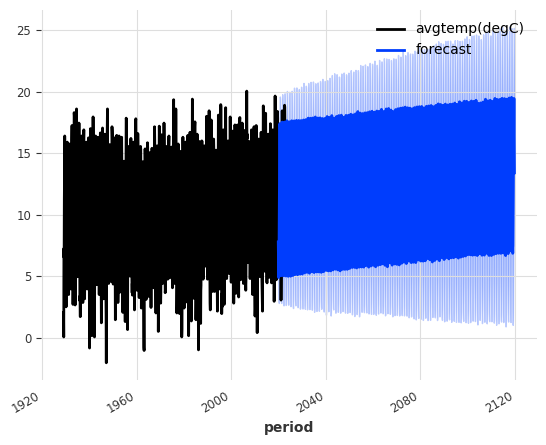

In [14]:
series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [15]:
series_sun = TimeSeries.from_dataframe(data, "period", "sun(hours)")
train, val = series_sun[:-36], series_sun[-36:]
model = ExponentialSmoothing()
model.fit(train)
prediction_sun = model.predict(1200, num_samples=1000)

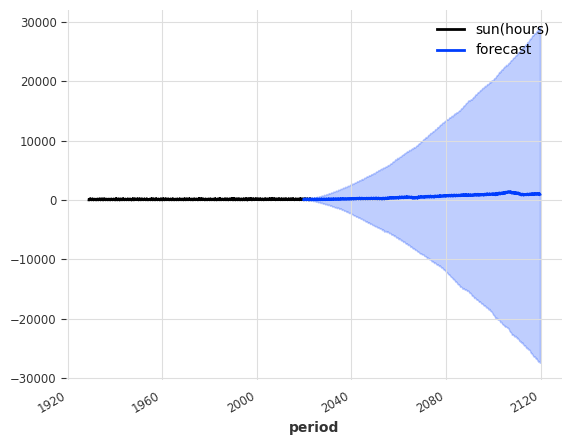

In [16]:
series_sun.plot()
prediction_sun.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

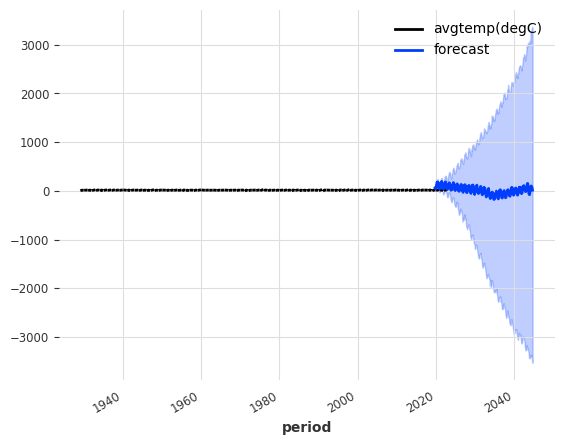

In [58]:
series_summer.plot()
prediction_summ.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [73]:
prediction1[992].mean()

<TimeSeries (DataArray) (period: 1, component: 1, sample: 1)>
array([[[19.01866246]]])
Coordinates:
  * period     (period) datetime64[ns] 2102-07-01
  * component  (component) object 'avgtemp(degC)'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None